In [105]:
import pandas as pd

In [106]:
names1880 = pd.read_csv('/Users/uk250007/Desktop/Data/names/yob1880.txt', names=['name', 'sex', 'births']) 

In [107]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [215]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [290]:
years = range(1880,2018)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '/Users/uk250007/Desktop/Data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
frame ['year'] = year
pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [291]:
names

,name,sex,births,year
0,Emma,F,19738,2017
1,Olivia,F,18632,2017
2,Ava,F,15902,2017
3,Isabella,F,15100,2017
4,Sophia,F,14831,2017
5,Mia,F,13437,2017
6,Charlotte,F,12893,2017
7,Amelia,F,11800,2017
8,Evelyn,F,10675,2017
9,Abigail,F,10551,2017


In [294]:
total_births=names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [295]:
total_births.tail()

sex,F,M
year,,
2017,1711811,1834490


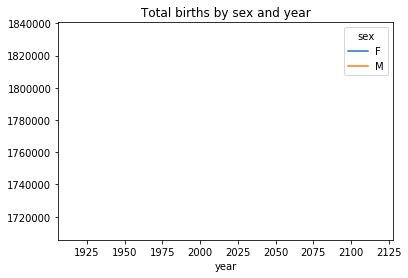

In [270]:
total_births.plot(title='Total births by sex and year')

In [249]:
def add_prop(group):
    births = group.births.astype(float)
    
    group ['prop'] = births / births.sum()
    return group

names=names.groupby(['year','sex']).apply(add_prop)

In [297]:
add_prop(names)

,name,sex,births,year,prop
0,Emma,F,19738,2017,0.005566
1,Olivia,F,18632,2017,0.005254
2,Ava,F,15902,2017,0.004484
3,Isabella,F,15100,2017,0.004258
4,Sophia,F,14831,2017,0.004182
5,Mia,F,13437,2017,0.003789
6,Charlotte,F,12893,2017,0.003636
7,Amelia,F,11800,2017,0.003327
8,Evelyn,F,10675,2017,0.003010
9,Abigail,F,10551,2017,0.002975


In [247]:
def square(a):
    """Return the square of a"""
    return a ** 4

In [117]:
square(6)

1296

In [118]:
import numpy as np

In [119]:
np.random.randint(0,100, (3,4))

array([[14, 40, 49, 17],
       [82, 56, 32, 23],
       [ 4, 76, 17, 82]])

In [120]:
np.arange(randTest)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])